# Clustering

<img src=''>

Clustering is a technique in machine learning and data analysis that involves grouping similar data points together based on certain features or characteristics. The goal of clustering is to partition a dataset into groups, or clusters, in such a way that the data points within a cluster are more similar to each other than to those in other clusters. This helps identify patterns, structures, or relationships within the data.

### **Key points about clustering**:

**Unsupervised Learning**: Clustering is typically an unsupervised learning task, meaning that the algorithm does not rely on labeled data with predefined categories. Instead, it identifies patterns or groupings based solely on the inherent structure of the data.

**Similarity Metric**: Clustering algorithms use a similarity metric to measure how close or similar data points are to each other. The choice of similarity metric depends on the nature of the data and the specific requirements of the analysis.

**Objective**: The primary objective of clustering is to maximize intra-cluster similarity and minimize inter-cluster similarity. In other words, points within the same cluster should be more similar to each other, and points in different clusters should be less similar.

### **Common Algorithms**:

1. **K-Means**
2. **Hierarchical Clustering**
3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
4. **Agglomerative Clustering**:

### Applications:

* Customer segmentation in marketing.
* Image segmentation in computer vision.
* Anomaly detection in cybersecurity.
* Document clustering in natural language processing.
* Genomic clustering in bioinformatics.

Clustering is a versatile technique used across various domains to uncover patterns, discover hidden structures, and gain insights into the underlying organization of data.


**K-Means**: A popular centroid-based clustering algorithm that partitions the data into a specified number (k) of clusters. It aims to minimize the sum of squared distances between data points and the centroid of their assigned cluster

The dataset


|| Variable | Type | Missing Values |
| --- | --- | --- | --- |
|1| age	| Integer	| no |
|2| workclass | Categorical | yes |
|3| fnlwgt	| Integer	| no |
|4| education	| Categorical	|	no |
|5| education-num	| Integer	|	no |
|6| marital-status	|	Categorical |	no |
|7| occupation	|	Categorical	| yes |
|8| relationship	|	Categorical	|	no |
|9|race | Categorical |	no |
|10| sex	| Binary	| no |
|11|capital-gain |	Integer			|	no |
|12|capital-loss |	Integer			|	no |
|13|hours-per-week|	Integer		|		no |
|15|native-country	|	Categorical	| no |
|15|income |	Binary	| no |

<br>

### Credits
```
  author       = Becker,Barry and Kohavi,Ronny,
  title        = Adult,
  year         = 1996,
  publishedby  = UCI Machine Learning Repository,
  DOI          = https://doi.org/10.24432/C5XW20
```



This notebook is all about carrying out clustering analysis on the Adult dataset to find possible clusters.

# Sections:

1. <a href="#libraries-id">Importing the libraries</a>
2. <a href="#data-id">Data Preprocessing</a>
3. <a href="#pca">Principal Component Analysis</a>
4. <a href="#Kmeans-id">Kmeans</a>


### <a id='libraries'>Importing the libraries</a>




In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from pickle import load, dump
from sklearn.metrics import (jaccard_score, f1_score,
                            accuracy_score, confusion_matrix, log_loss)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from datetime import datetime
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.figure_factory as ff


### <a id= 'data-id'>Data Preprocessing</a>

In [2]:
df= pd.read_csv('Results.csv', sep=',')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,pay_grade
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.columns

In [ ]:
df.info()


In [3]:
def labelEnc(feat:str)->list:
    """
      This function converts the categorical variables in a feature to
      numerical by using the unique values in the column
    """
    uniques = dict(zip(list(df[feat].unique()), list(range(len(df[feat].unique())+1))))
    print(uniques)
    newlist = list(map(lambda x: uniques[x],df[feat] ))
    return newlist


In [4]:
for i in df.columns:
    if df[i].dtype =='object':
        df[i] = labelEnc(i)

{' State-gov': 0, ' Self-emp-not-inc': 1, ' Private': 2, ' Federal-gov': 3, ' Local-gov': 4, ' ?': 5, ' Self-emp-inc': 6, ' Without-pay': 7}
{' Bachelors': 0, ' HS-grad': 1, ' 11th': 2, ' Masters': 3, ' 9th': 4, ' Some-college': 5, ' Assoc-acdm': 6, ' Assoc-voc': 7, ' 7th-8th': 8, ' Doctorate': 9, ' Prof-school': 10, ' 5th-6th': 11, ' 10th': 12, ' 1st-4th': 13, ' Preschool': 14, ' 12th': 15}
{' Never-married': 0, ' Married-civ-spouse': 1, ' Divorced': 2, ' Married-spouse-absent': 3, ' Separated': 4, ' Married-AF-spouse': 5, ' Widowed': 6}
{' Adm-clerical': 0, ' Exec-managerial': 1, ' Handlers-cleaners': 2, ' Prof-specialty': 3, ' Other-service': 4, ' Sales': 5, ' Craft-repair': 6, ' Transport-moving': 7, ' Farming-fishing': 8, ' Machine-op-inspct': 9, ' Tech-support': 10, ' ?': 11, ' Protective-serv': 12, ' Armed-Forces': 13, ' Priv-house-serv': 14}
{' Not-in-family': 0, ' Husband': 1, ' Wife': 2, ' Own-child': 3, ' Unmarried': 4, ' Other-relative': 5}
{' White': 0, ' Black': 1, ' Asia

In [5]:
df.dropna(inplace=True)

In [6]:
df.columns.__len__()

15

In [7]:
# Scaling the dataset for better data

scaler = StandardScaler()
scaled_df= scaler.fit_transform(df)

This helps to visualise and have an idea the number of clusters we can expect to see in the data set. This is known as the Hierachial Clustering using dendrogram to visualise.

In [11]:

figure = ff.create_dendrogram(scaled_df[:50],color_threshold=1.5)
figure.update_layout(width=800, height=500)
figure.show()

In [77]:
scaled_df[0]

array([ 0.02941147, -1.86979854, -1.06491264, -0.99344448,  1.15218945,
       -0.85799429, -1.38634952, -1.06991968, -0.36196702, -0.69515422,
        0.161728  , -0.22810576, -0.04286428, -0.2595867 , -0.56842005])

### <a id="pca">Principal Component Analysis

In [12]:
pca = PCA()
pca.fit(scaled_df)

pca.explained_variance_ratio_


array([0.1364448 , 0.10005706, 0.09441591, 0.0815927 , 0.07484399,
       0.06981427, 0.06723509, 0.06522987, 0.05409967, 0.05125734,
       0.05024944, 0.04686458, 0.04019113, 0.03688987, 0.03081428])

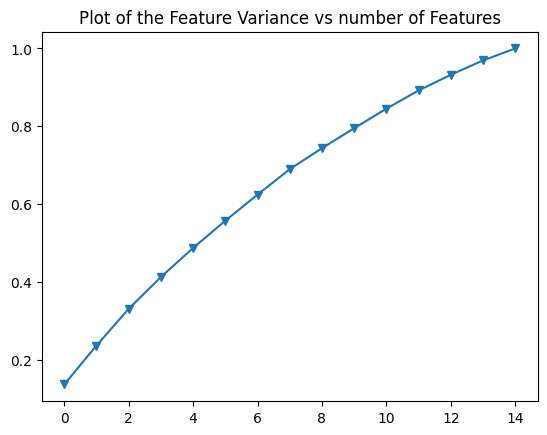

In [13]:
# import matplotlib.pyplot as plt
plt.title('Plot of the Feature Variance vs number of Features')
plt.plot(range(0,15), pca.explained_variance_ratio_.cumsum(), marker='v')
plt.show()

In [43]:
# from this PCA analysis above we can pick the 9 top features, given
pc = PCA(n_components=7)

pc.fit(scaled_df)

PCA(n_components=7)

In [44]:
pc.components_[0]

array([ 0.25962742, -0.03249355, -0.06998162, -0.16787303,  0.40522436,
        0.00559468, -0.18178877, -0.35906721, -0.15733549, -0.29016343,
        0.20908268,  0.18730694,  0.37021761, -0.08433559,  0.49022667])

In [45]:
# to figure out the features that are important

sd = np.abs(pc.components_[0]).argsort()[::-1]
major_components = pd.DataFrame(np.abs(pc.components_[0]),
                                index=df.columns[sd],
                                columns=['Value'])
major_components.sort_values(by='Value', ascending=False)

,Value
marital_status,0.490227
sex,0.405224
fnlwgt,0.370218
capital_loss,0.359067
education,0.290163
pay_grade,0.259627
race,0.209083
native_country,0.187307
capital_gain,0.181789
relationship,0.167873


We can see the features that are more important to carry out clustering in the data set are the following ,marital_status, sex, fnlwgt, capital_loss,education, pay_grade, race. The essence of PCA is dimensionality reduction which has enabled us to reduce from 15 to 7.

These are the top 7 that we will be using for our KMeans clustering analysis.

In [46]:
pca_df = pc.transform(scaled_df)

In [47]:
pca_df[0]

array([ 1.3850961 , -1.74360715,  0.75727967, -0.88419219, -1.15489276,
       -0.38160259, -1.499777  ])

In [48]:
cls = []
for i in range(1,15):
    KM = KMeans(n_clusters=i, init='k-means++', n_init='auto')
    KM.fit(pca_df)
    cls.append(KM.inertia_)

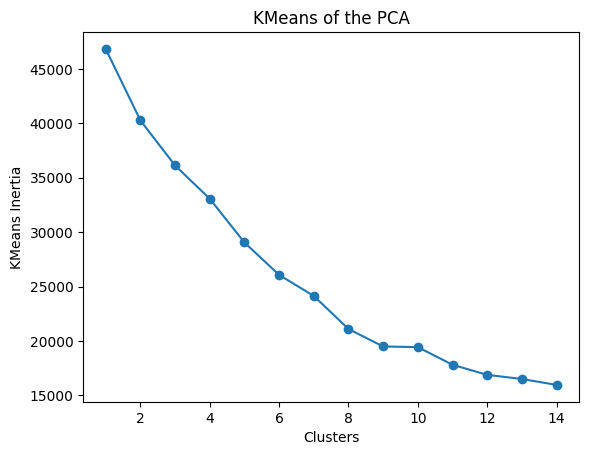

In [78]:
plt.title('KMeans of the PCA')
plt.plot(range(1,15), cls, marker='o')
plt.xlabel('Clusters')
plt.ylabel('KMeans Inertia')
plt.show()

Using the [elbow method](https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/) we can see that the number of clusters ideally is 3/4 judging with the eyes but lets check.

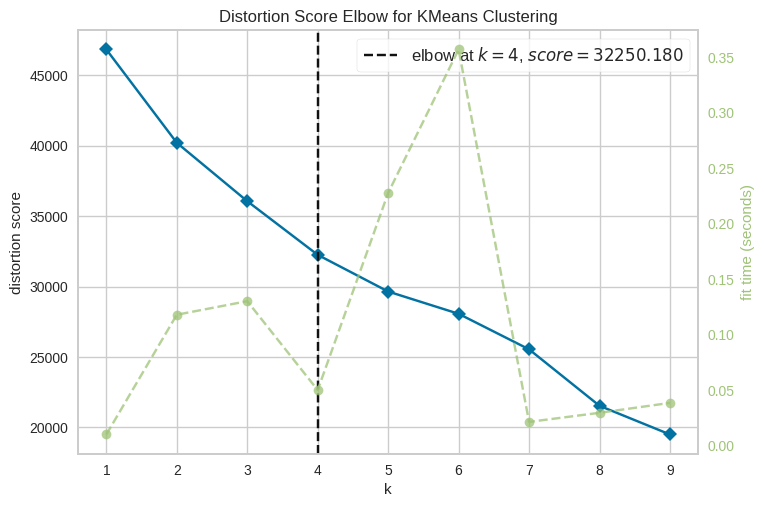

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [172]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(n_init='auto',init='k-means++')
visualizer = KElbowVisualizer(km, k=(1,10))

visualizer.fit(pca_df)        # Fit the data to the visualizer
visualizer.show()

The KElbowVisualizer model is predicting 4, but is 4 the most optimal.

Let us crosscheck with the Silhouette method to pick our _**k**_ using the following conditions

1. For a particular K, all the clusters should have a Silhouette score greater than the average score of the data set represented by the red-dotted line. The x-axis represents the Silhouette score.
2. There shouldn’t be wide fluctuations in the size of the clusters. The width of the clusters represents the number of data points.




0.161274170044027
0.1514504959859651
0.18125382801307593
0.17009033068069918
0.19046012198894058
0.18575079828472785
0.22286893708569114
0.20377138442754208
0.20589584178769366


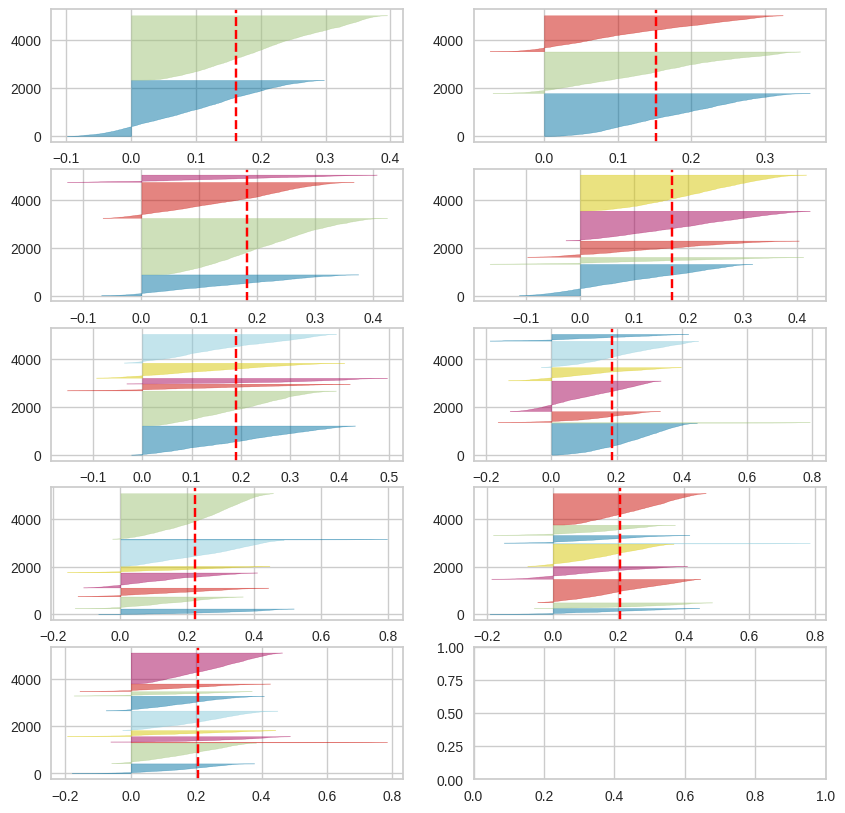

In [124]:
from yellowbrick.cluster import SilhouetteVisualizer


fig, ax = plt.subplots(5, 2, figsize=(10,10))
for i in [2, 3, 4, 5,6,7,8,9,10]:
    '''
    Create KMeans instances for different number of clusters
    '''

    km = KMeans(n_clusters=i, init='random', n_init='auto',)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer_sil = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer_sil.fit(pca_df)
    # plt.vlines(, ymin=0,ymax=2000 )
    print(visualizer_sil.silhouette_score_)



Using the above conditions for selecting our cluster,

1. They all pass the first check, they are above the mean, the red line is depicting the mean value.
2. Only <mark>k=3</mark> has close to equal sizes of the clusters.

We can deduce finally that we have 3 clusters.



Implementing this <mark>k=3</mark> in our KMeans algorithm now

### <a id="#Kmeans-id"> KMeans</a>

In [179]:
Kmeans_pca = KMeans(n_clusters=3, init='k-means++', n_init='auto')

Kmeans_pca.fit(pca_df)


KMeans(n_clusters=3, n_init='auto')

In [180]:
# these are the cluster labels 
Kmeans_pca.labels_

array([1, 0, 2, ..., 1, 1, 2], dtype=int32)

In [181]:
# creating a dataframe from the components used by the KMeans
df_pc = pd.DataFrame(pca_df,columns=[f'Component{i}'for i in range(1,8)])
df_pc.head()

,Component1,Component2,Component3,Component4,Component5,Component6,Component7
0,1.385096,-1.743607,0.757280,-0.884192,-1.154893,-0.381603,-1.499777
1,0.377618,-0.438815,1.517646,-1.014554,-0.416200,-0.455524,-1.024343
2,0.371911,0.135254,0.196502,-0.734063,-0.941219,-0.144708,-0.367693
3,-0.237800,0.444952,-0.042851,0.414431,-1.028683,-0.393852,-0.496796
4,-0.663421,-1.546723,1.359329,0.604464,0.441148,-0.127318,0.498663


In [182]:
df_pc['Label'] = Kmeans_pca.labels_


In [183]:
df_pc.Label.value_counts()

2    1781
0    1737
1    1482
Name: Label, dtype: int64

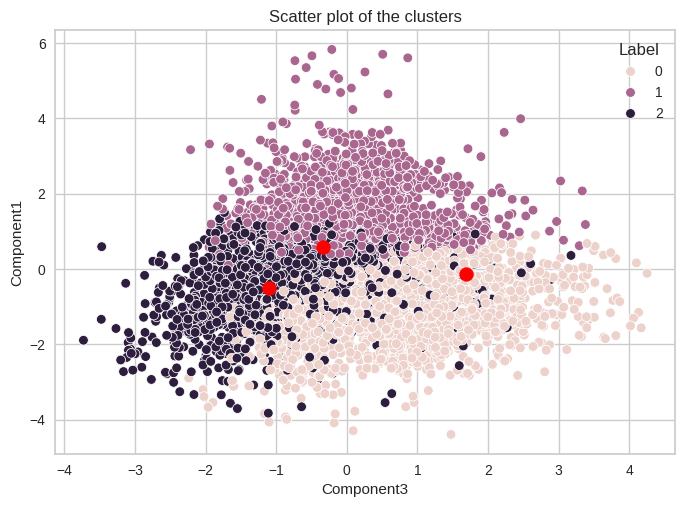

In [186]:
# to  create a plot of the data to see the clusters.
sns.scatterplot(data=df_pc, x='Component3', y='Component1', hue='Label', )
plt.title('Scatter plot of the clusters')
plt.scatter(Kmeans_pca.cluster_centers_[:, 0], Kmeans_pca.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.show()

Clearly we can see the distinction in the 3 parts, and also we cna see the centroids in red.

In [185]:
combined_df = pd.concat([pd.DataFrame(scaled_df, columns=df.columns), df_pc], axis=1)

In [133]:
combined_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,native_country,pay_grade,Component1,Component2,Component3,Component4,Component5,Component6,Component7,Label
0,0.029411,-1.869799,-1.064913,-0.993444,1.152189,-0.857994,-1.386350,-1.069920,-0.361967,-0.695154,...,-0.259587,-0.56842,1.385096,-1.743607,0.757280,-0.884192,-1.154893,-0.381603,-1.499777,4
1,0.838632,-1.074884,-1.010422,-0.993444,1.152189,-0.070699,-1.092619,-0.376697,-0.361967,-0.695154,...,-0.259587,-0.56842,0.377618,-0.438815,1.517646,-1.014554,-0.416200,-0.455524,-1.024343,4
2,-0.044154,-0.279969,0.233924,-0.698058,-0.425936,0.716596,-0.798888,-1.069920,-0.361967,-0.695154,...,-0.259587,-0.56842,0.371911,0.135254,0.196502,-0.734063,-0.941219,-0.144708,-0.367693,4
3,1.059328,-0.279969,0.413286,-0.402671,-1.214999,-0.070699,-0.798888,-0.376697,1.296910,-0.695154,...,-0.259587,-0.56842,-0.237800,0.444952,-0.042851,0.414431,-1.028683,-0.393852,-0.496796,4
4,-0.779809,-0.279969,1.388265,-0.993444,1.152189,-0.070699,-0.505158,0.316525,1.296910,1.438530,...,-0.059319,-0.56842,-0.663421,-1.546723,1.359329,0.604464,0.441148,-0.127318,0.498663,3


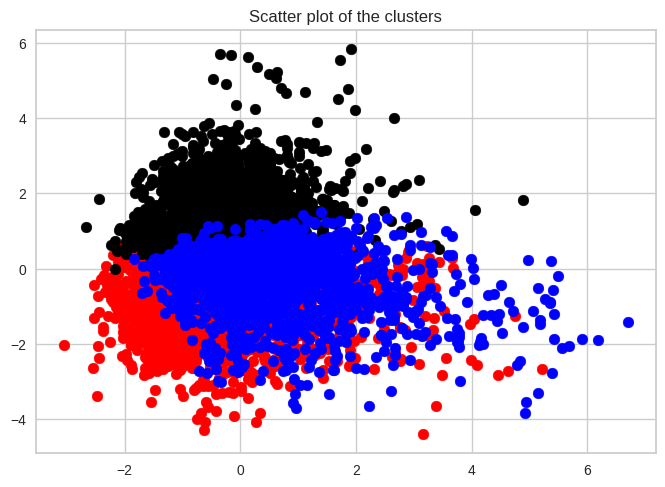

In [189]:
# sns.scatterplot(data=combined_df, x='sex', y='marital_status', hue='Label', )
plt.scatter(combined_df.loc[combined_df.Label==0,'Component2'],combined_df.loc[combined_df.Label==0,'Component1'],s = 60, c = 'red', label = 'Cluster1')
plt.scatter(combined_df.loc[combined_df.Label==1,'Component2'],combined_df.loc[combined_df.Label==1,'Component1'],s = 60, c = 'black', label = 'Cluster2')
plt.scatter(combined_df.loc[combined_df.Label==2,'Component2'],combined_df.loc[combined_df.Label==2,'Component1'],s = 60, c = 'blue', label = 'Cluster3')
plt.title('Scatter plot of the clusters')
plt.show()

In [137]:
selected_variables =['Component1' ,'Component2', 'Component3']

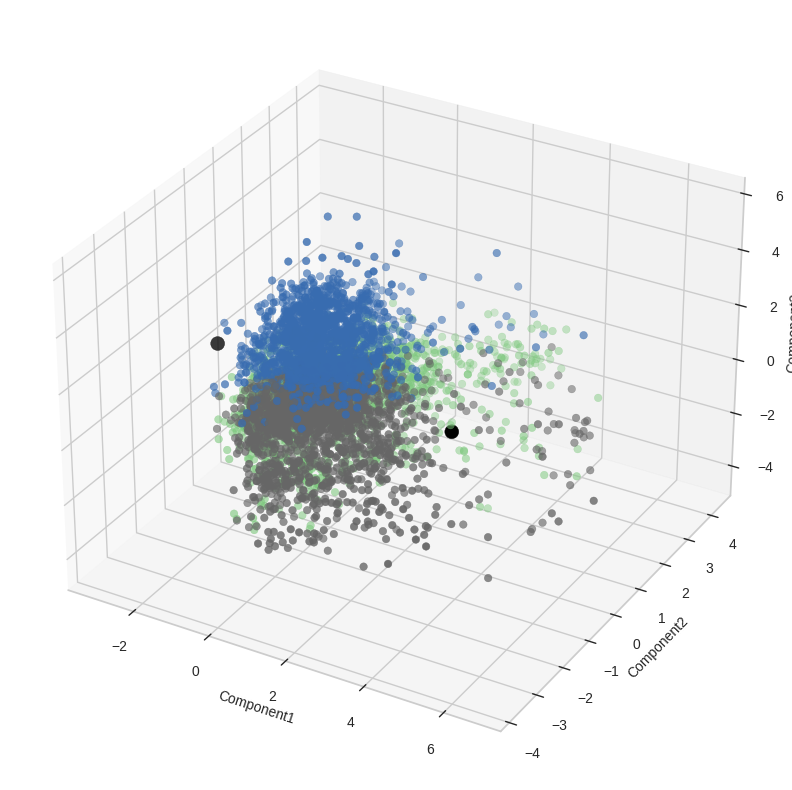

In [191]:
plt.figure(figsize=(10,10))

ax = plt.axes(projection="3d")
z_points = combined_df[selected_variables[0]]
x_points = combined_df[selected_variables[1]]
y_points = combined_df[selected_variables[2]]
f1=ax.scatter3D(x_points, y_points, z_points,
                c=combined_df.Label,
                cmap='Accent',
                s=30)
ax.set_xlabel(selected_variables[0],fontsize = 10)
ax.set_ylabel(selected_variables[1],fontsize = 10)
ax.set_zlabel(selected_variables[2],fontsize = 10)
# ax.legend(clusters)
f2 = ax.scatter3D(Kmeans_pca.cluster_centers_[:, 0]*2,
              Kmeans_pca.cluster_centers_[:, 1]*2,
              Kmeans_pca.cluster_centers_[:, 2]*2,
              s = 100, c = 'black', label = 'Centroids')

plt.show()


The shape of the clusters make more sense in 3D, we can see that the overlap in the 2D isnt categorically an overlap.